In [1]:
import os
os.chdir('/Users/marie-camilleachard/Documents/5. SPRING/2. STAT 154/Final project/')

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X = np.load("MaskDataCorrected.npz")['X'][()] 

X.shape

(1578627, 1000)

In [4]:
y = np.load("MaskDataCorrected.npz")['y'][()] 

y.shape

(1578627,)

In [16]:
test_index = y==-1
train_labels = y[~test_index]
train_samples = X[~test_index,:]
test_samples = X[test_index, :]

In [6]:
train_samples.shape

(1528627, 1000)

In [7]:
import pickle
pkl_file = open('vocab.pkl', 'rb')
vocab = pickle.load(pkl_file)

In [8]:
len(vocab)

1000

In [17]:
df=pd.DataFrame(train_samples.todense())
df.columns=vocab

In [20]:
df.head()

,.,!,i,"""",to,the,",",a,my,and,...,exactly,kid,exciting,annoying,keeps,case,wine,apple,wishes,son
0,2,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
sum_occurences=pd.Series(df.sum(axis=0))

In [36]:
sum_occurences.sort()

In [38]:
sum_occurences[0:20]

son         2059
wishes      2072
apple       2073
exciting    2077
wine        2078
keeps       2079
case        2083
exactly     2084
annoying    2085
wit         2094
�           2094
kid         2096
re          2100
hmmm        2101
gorgeous    2102
hospital    2102
played      2106
twilight    2110
kill        2115
needed      2117
dtype: int64

In [61]:
sum_occurences[-100:]

*           36951
)           37092
there       37708
as          37897
when        37907
oh          38053
home        38330
thanks      38891
think       39906
(           40279
want        40317
how         40506
new         40686
well        40904
night       41294
still       41959
if          42239
'           42372
its         43012
can't       44159
some        44207
see         44570
can         46053
had         46404
amp         46832
don't       47295
really      48057
im          48713
about       48743
we          50060
           ...   
be         108908
with       111203
just       122172
i'm        126497
but        128627
that       138208
have       140135
&          140486
;          144739
so         147390
me         156719
on         161381
0          170819
of         177202
in         207650
for        208333
it         227484
is         227771
?          237738
you        263756
and        292913
my         303800
a          367367
,          463684
the       

In [40]:
length_tweets=pd.Series(df.sum(axis=1))

In [41]:
length_tweets.sort()

In [45]:
type(length_tweets)

pandas.core.series.Series

In [54]:
sum(length_tweets.values==0)

8872

In [55]:
sum(length_tweets>140)

440

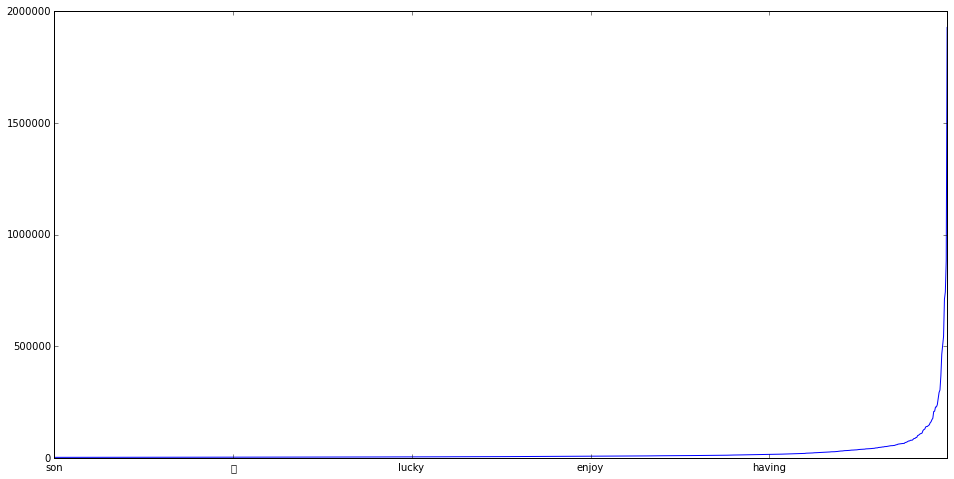

In [60]:
sum_occurences.plot(figsize=(16,8))

# Specific words testing

In [118]:
word='like'
print (word in vocab)
print sum_occurences[word]

True
75722


In [119]:
size=len(train_labels)
index = np.arange(size)
test= pd.DataFrame(columns=[word, 'label'], index = index)
test[word]=pd.Series(df[word], index=index)
test['label']=pd.Series(train_labels, index=index)
index=test[word]>0
subtest=test[index]

In [120]:
total=len(subtest)
print total
pos=float(sum(subtest.label))/total
print pos

72724
0.47694021231


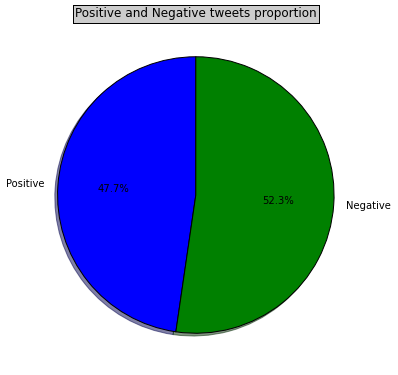

In [121]:
from pylab import *

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'Positive', 'Negative'
fracs = [pos, 1-pos]

pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

title('Positive and Negative tweets proportion', bbox={'facecolor':'0.8', 'pad':5})
show()